96
cuda True
torch.Size([32, 3, 128, 128])


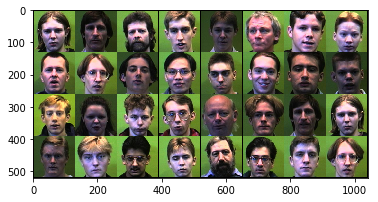

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2d(32, eps=1e-05, momen

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import random

transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/DL/faces94', transform=transform)
# print(dataset.samples)


dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)
print(len(dataloader))

device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")
print(device, torch.cuda.is_available())


import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.grid(False)
    plt.show()


dataiter = iter(dataloader)
images, labels = dataiter.next()

print(images.shape)
# show images
imshow(torchvision.utils.make_grid(images))


#custom weight initialization
def weights_init(modal):
    classname = modal.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(modal.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(modal.weight.data, 1.0, 0.02)
        nn.init.constant_(modal.bias.data, 0)


class Generator(nn.Module):
    
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
        
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(64, 32, 4, 2, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(32, 3, 4, 2, 1, bias=False),
            nn.Tanh(),
        )
        
    def forward(self, input):
        return self.main(input)

      
net = Generator().to(device)
# net.apply(weights_init)
print(net)

# noise = torch.Tensor(100)
# noise:random(1,100)
# noise = noise.random_(1,100)
# noise = torch.randn(32, 100, 1, 1, device=device)
# print(noise.shape)

# out = net(noise)
# print(out.detach())

# imshow(torchvision.utils.make_grid(out.detach()))
# print(out.detach().shape)

class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.main = nn.Sequential(
            nn.Conv2d(3, 8, 4, 2, 1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            
            nn.Conv2d(8, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            
            nn.Conv2d(16, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            
            nn.Conv2d(128, 1, 4, 1, 0),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.main(input)
      
dis = Discriminator().to(device)
# dis.apply(weights_init)
print(dis)
# noise = torch.randn(32, 3, 128, 128, device=device)
# print(dis(noise))


criterion = nn.BCELoss() #binary cross entropy loss function

real_label = 1
fake_label = 0
lr = 0.0002
# Setup Adam optimizers for both G and D
optimizerD = torch.optim.Adam(dis.parameters(), lr=lr)
optimizerG = torch.optim.Adam(net.parameters(), lr=lr)



In [0]:
generated_images = list()

num_epochs = 40
# net.train()
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        if i<95:
          dis.zero_grad()
          real_cpu = data[0].to(device)

          #if(i==95):
            #imshow(torchvision.utils.make_grid(real_cpu))
            #print(fake.detach().shape)
  #         print(real_cpu)
          b_size = real_cpu.size(0)
  #         print(b_size)
          label = torch.full((b_size,), real_label, device=device)
  #         print(label)
          # Forward pass real batch through D
          output = dis(real_cpu).view(-1)
  #         print(output)
          #print(output.shape)
  #         break
          errorD_real = criterion(output, label)
  #         print(errorD_real)
  #         break
          errorD_real.backward()

          noise = torch.randn(32, 100, 1, 1, device=device)
          fake = net(noise)
#           print(fake.cpu())
          label.fill_(fake_label)

          output = dis(fake.detach()).view(-1)

          errorD_fake = criterion(output, label)
          errorD_fake.backward()

          errorD = errorD_real + errorD_fake
          optimizerD.step()


          net.zero_grad()
          label.fill_(real_label)  # fake labels are real for generator cost
          # Since we just updated D, perform another forward pass of all-fake batch through D
          output = dis(fake).view(-1)
          # Calculate G's loss based on this output
          errorG = criterion(output, label)
          # Calculate gradients for G
          errorG.backward()
          # Update G
          optimizerG.step()

#           print(i, real_cpu.shape)

          if i%50 == 0 or i==(len(dataloader)-2):
              print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f' % (epoch, num_epochs, i, len(dataloader),
                       errorD.item(), errorG.item()))
              imshow(torchvision.utils.make_grid(fake.cpu().detach()))
              print(fake.detach().shape)
              print(torch.cuda.get_device_name(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


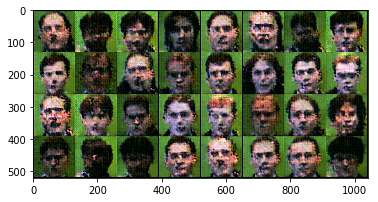

In [3]:
net.eval()
noise = torch.randn(32, 100, 1, 1, device=device)
# print(noise)
out = net(noise)
imshow(torchvision.utils.make_grid(out.cpu().detach()))

In [0]:
#saving checkpoint

import shutil
def save_checkpoint(state, is_best, filename='checkpointG.pth.tar'):
    torch.save(state, filename)
#     if is_best:
#         shutil.copyfile(filename, 'model_bestG.pth.tar')
   
#generator
save_checkpoint({
            'state_dict': net.state_dict(),
            'optimizer' : optimizerG.state_dict(),
        }, True, "/content/drive/My Drive/Colab Notebooks/checkpointDG.pth.tar")

#discriminator
save_checkpoint({
            'state_dict': dis.state_dict(),
            'optimizer' : optimizerD.state_dict(),
        }, True, "/content/drive/My Drive/Colab Notebooks/checkpointDD.pth.tar")

In [0]:
#load modal

#generator
checkpoint = torch.load("/content/drive/My Drive/Colab Notebooks/checkpointDG.pth.tar")
net.load_state_dict(checkpoint['state_dict'])
optimizerG.load_state_dict(checkpoint['optimizer'])

#discriminator
checkpoint = torch.load("/content/drive/My Drive/Colab Notebooks/checkpointDD.pth.tar")
dis.load_state_dict(checkpoint['state_dict'])
optimizerD.load_state_dict(checkpoint['optimizer'])